<a href="https://colab.research.google.com/github/Runa-w/Time_Series_Visualizer/blob/master/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()

In [36]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
#df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [38]:
# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

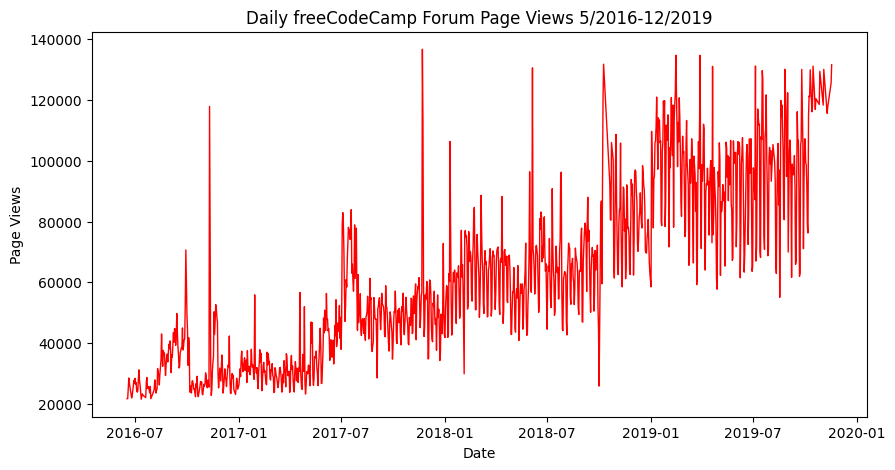

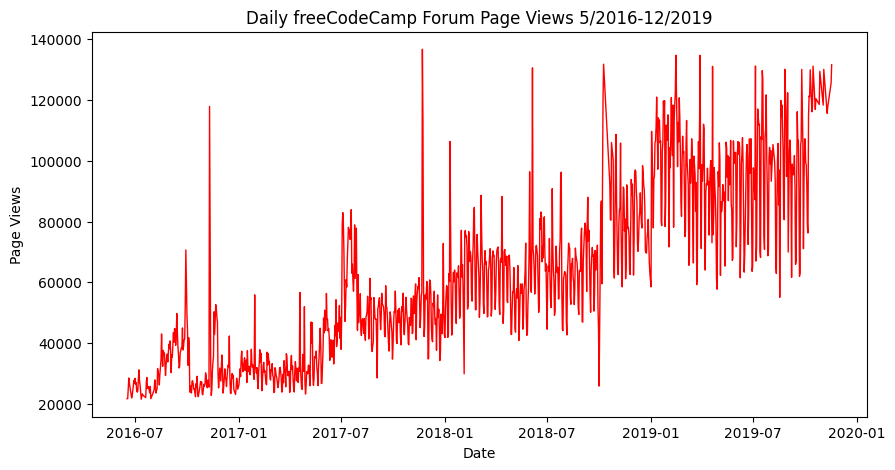

In [40]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(df.index, df['value'], 'r', linewidth = 1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

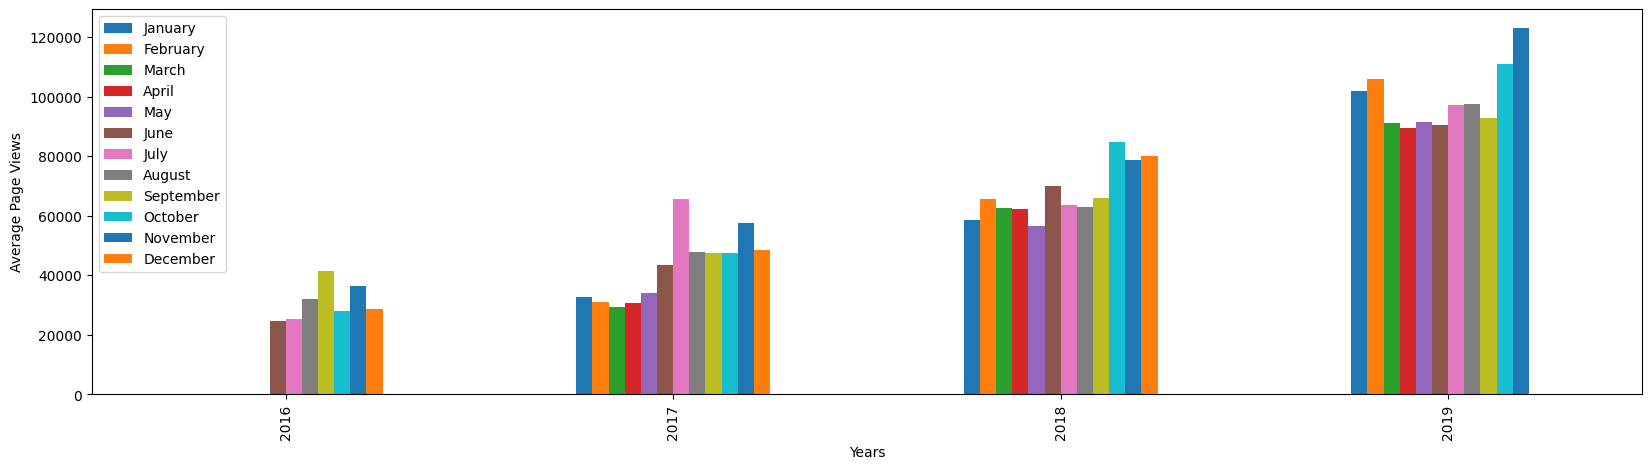

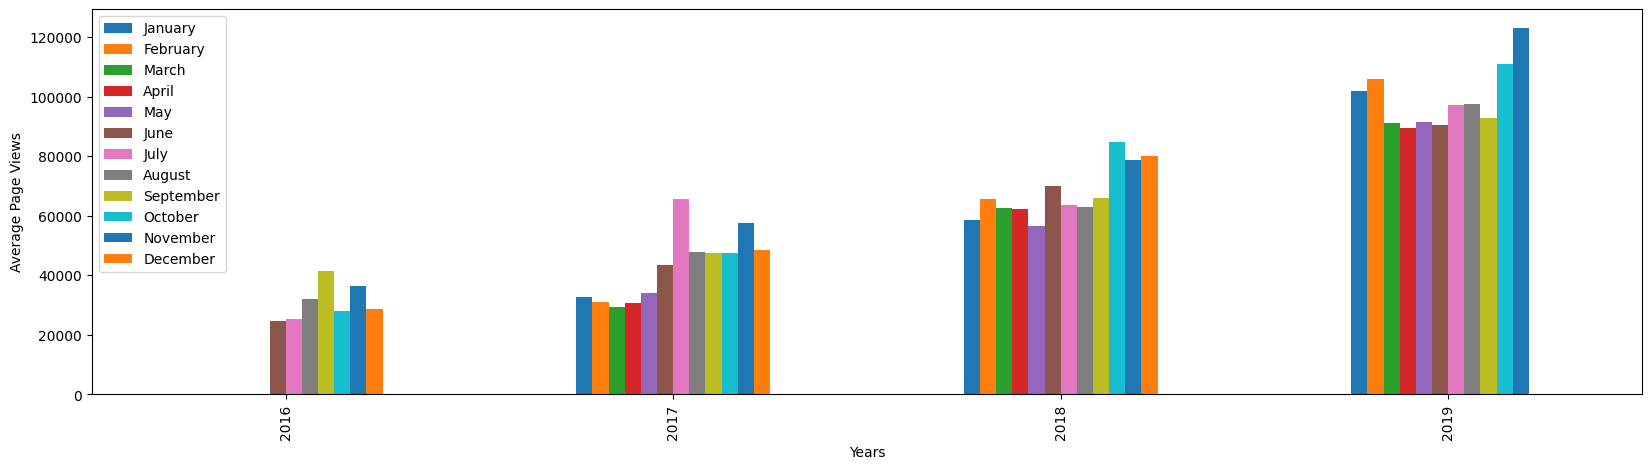

In [41]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend = True, figsize = (20, 5), ylabel = 'Average Page Views', xlabel = 'Years').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

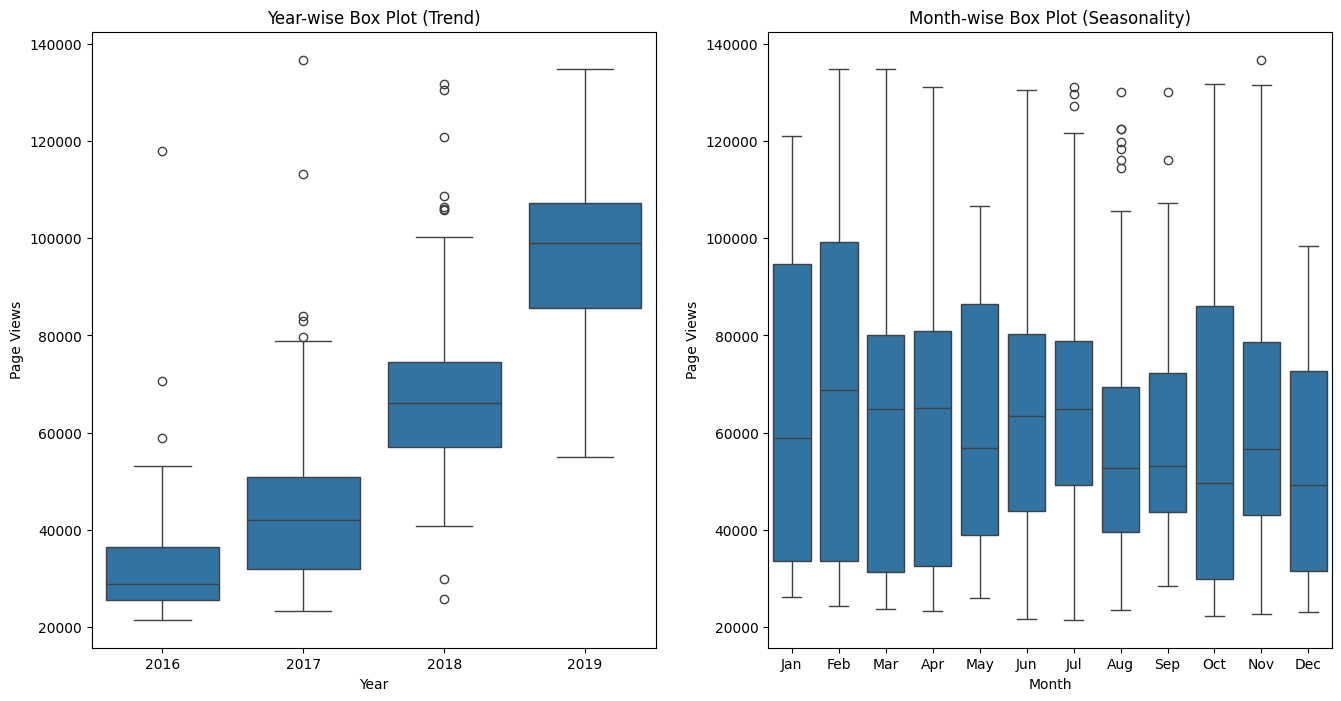

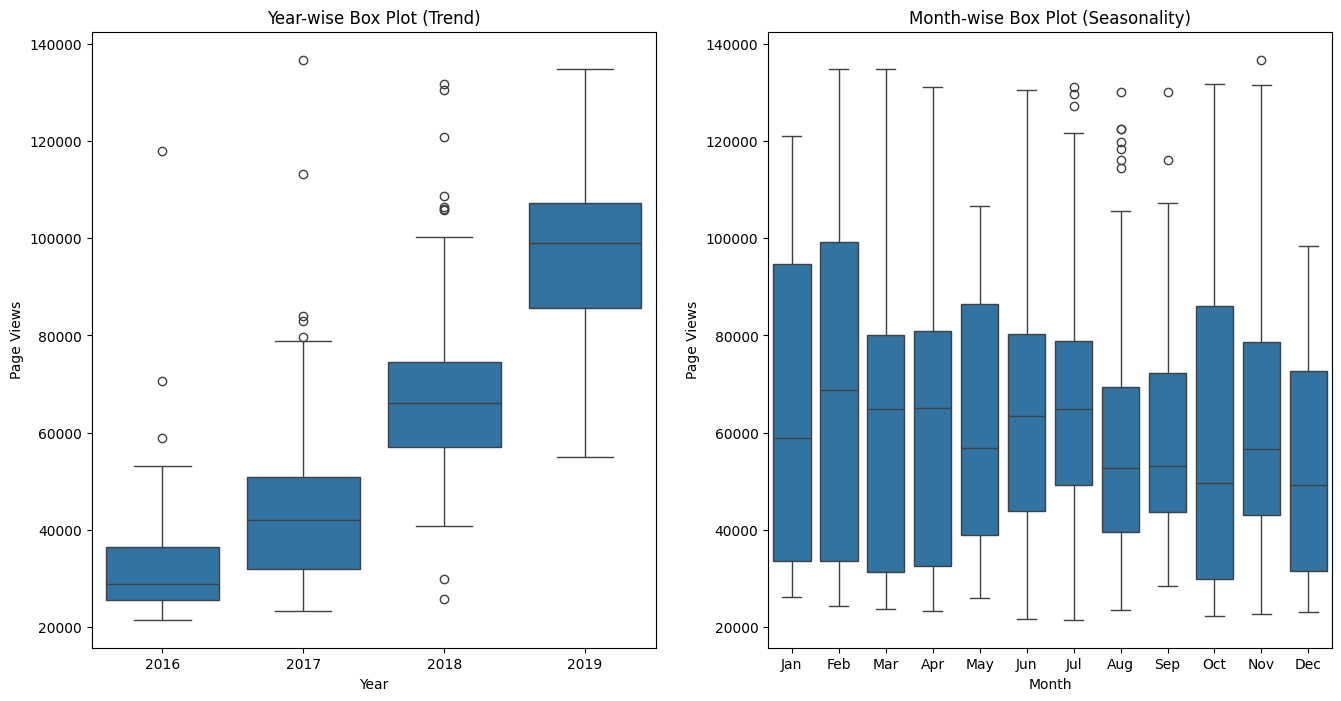

In [44]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().reset_index()
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    sns.boxplot(ax=ax1, x='year', y= 'value', data= df_box)

    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    sns.boxplot(ax=ax2, x='month', y= 'value', data=df_box)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()